In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score
import warnings 
warnings.filterwarnings('ignore')

# Step 1: Reading and understanding the data

In [3]:
master_data = pd.read_csv('day.csv')

In [4]:
master_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [5]:
master_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


#### There are total 730 rows and 15 columns in the original dataset.
#### There is no missing data in the dataset hence no missing value treatment is required.

In [6]:
# column instant is the unique identifier for the data and not adding any value to our observation hence it can be dropped
# create data variable after dropping the column, further operations will be performed on data 
# dropping columns casual and registered as they seems to be the break of cnt by category
# dropping column dteday as the month and year information is already available in other columns
data = master_data.drop(['instant','casual','registered','dteday'],axis = 1)

In [7]:
data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [8]:
#checking if there is any duplicates present in the data
# there is no change in the shape of data hence we can conclude that there are no duplicates in the data
data.drop_duplicates().shape


(730, 12)

In [9]:
# Replacing categorical columns season, mnth, weekday and weathersit with their text values instead of numeric representation 
# as there is no order between the categorical variables.
data.weathersit = data.weathersit.map({1:'clear', 2:'mist', 3:'light_snow' , 4: 'heavy_rain'})
data.season = data.season.map({1:'spring', 2:'summer', 3:'fall' , 4: 'winter'})
data.mnth = data.mnth.map({1:'jan',2:'feb',3:'mar',4:'apr',5:'may',6:'june',7:'july',8:'aug',9:'sep',10:'oct',11:'nov',12:'dec'})
data.weekday = data.weekday.map({0:'sun',1:'mon',2:'tue',3:'wed',4:'thu',5:'fri',6:'sat'})

In [10]:
data.head(3)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,jan,0,sat,0,mist,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,sun,0,mist,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,mon,1,clear,8.050924,9.47025,43.7273,16.636703,1349


### Visualizing the data

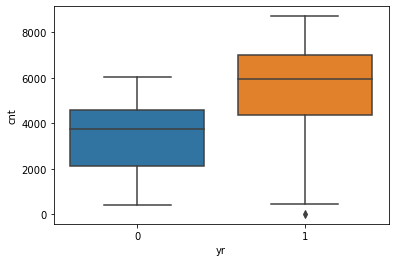

In [11]:
#plotting box plot to observe the bike sharing increase in 2019 compare to 2018
sns.boxplot(data=data , x= 'yr',y='cnt')
plt.show()

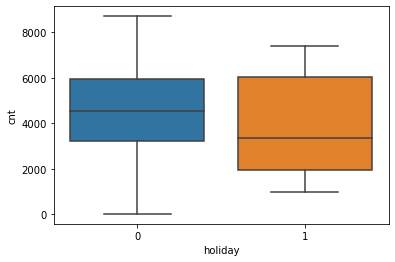

In [12]:
#plotting box plot to understand distribution of cnt against holiday
sns.boxplot(data=data , x= 'holiday',y='cnt')
plt.show()

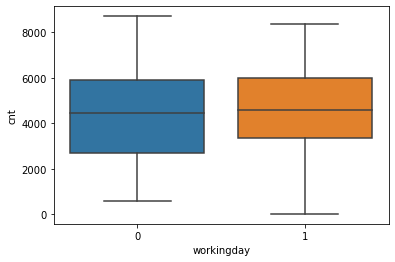

In [13]:
#plotting box plot to understand distribution of cnt against workingday
sns.boxplot(data=data , x= 'workingday',y='cnt')
plt.show()

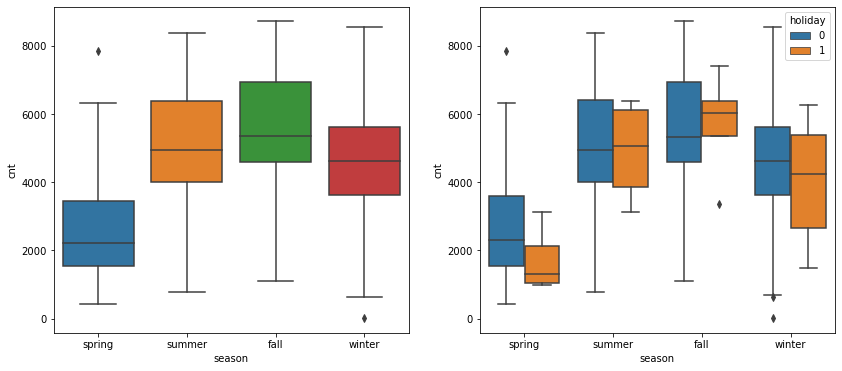

In [14]:
#plotting box plot to understand distribution of cnt against season
fig = plt.figure(figsize = (14,6))
plt.subplot(121)
sns.boxplot(data = data , x= 'season', y = 'cnt')
plt.subplot(122)
sns.boxplot(data = data , x= 'season', y = 'cnt',hue = 'holiday')
plt.show()

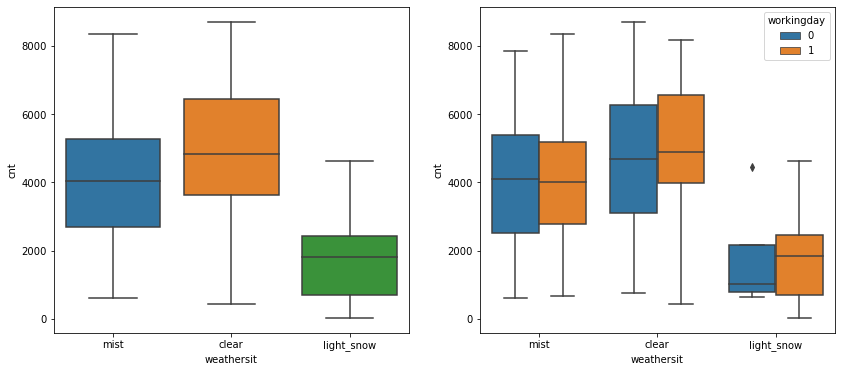

In [15]:
#plotting box plot to understand distribution of cnt against weather
fig = plt.figure(figsize = (14,6))
plt.subplot(121)
sns.boxplot(data = data , x= 'weathersit', y = 'cnt')
plt.subplot(122)
sns.boxplot(data = data , x= 'weathersit', y = 'cnt',hue = 'workingday')
plt.show()

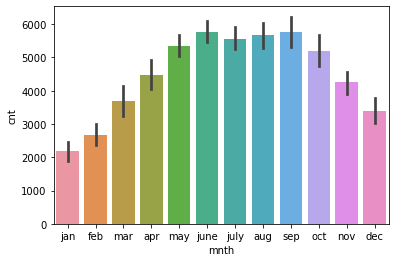

In [16]:
sns.barplot(data=data,x='mnth',y='cnt')
plt.show()

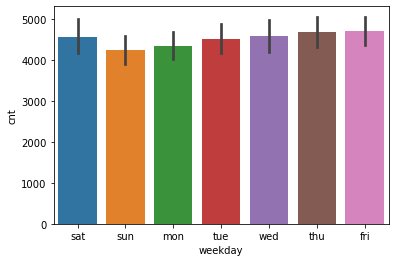

In [17]:
sns.barplot(data=data,x='weekday',y='cnt')
plt.show()

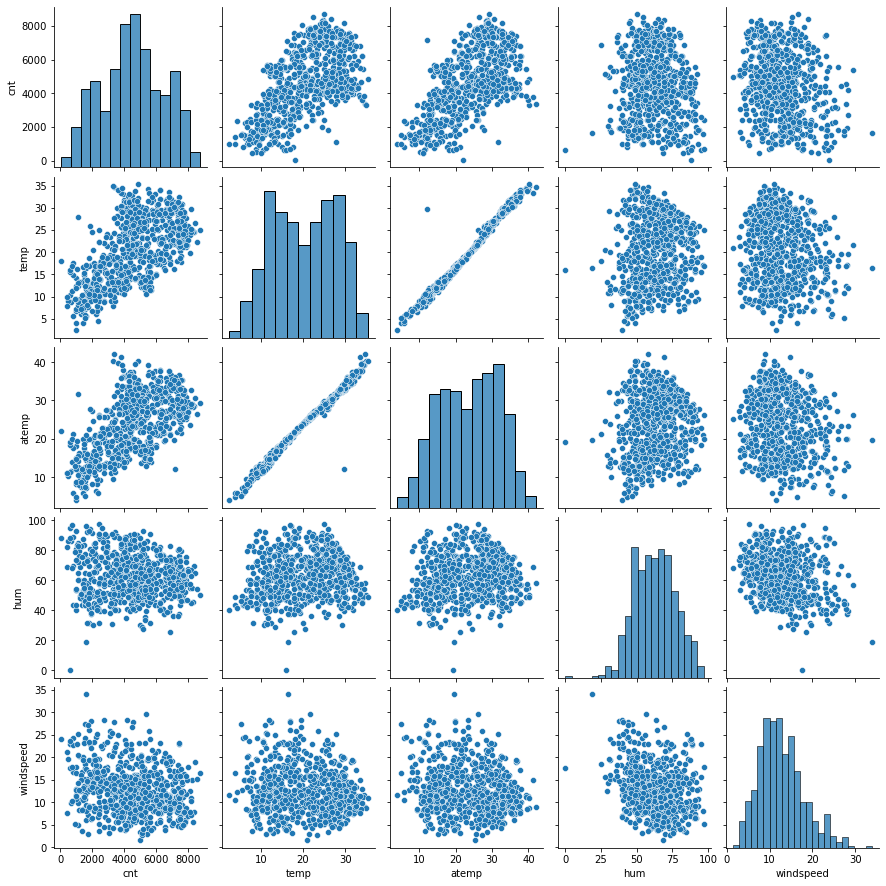

In [18]:
# Drawing pait plot between numerical variables
cols = ['cnt','temp','atemp','hum','windspeed']
sns.pairplot(data[cols])
plt.show()

Here we see target variable `cnt` has very good linear relationship with `temp,atemp, casual and registered `variables.
Also we see temp and atemp variables have a solid linear relationship between them hence we will drop atemp moving forward.

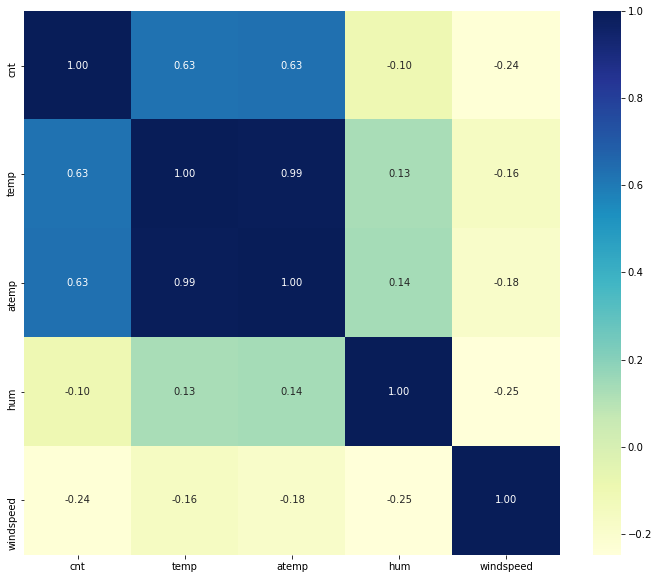

In [19]:
fig = plt.figure(figsize=(12,10))
sns.heatmap(data[['cnt','temp','atemp','hum','windspeed']].corr(),annot=True,cmap='YlGnBu',fmt = '.2f')
plt.show()

### Observation:
Target variable `cnt` has good correlation with following independent variables. 
##### Independent variables with positive correlation : temp and atemp
##### Independent variables with negative correlation : windspeed

# Step 2 : Data Preparation

Creating dummy values for categorical variables season, month ,weekday and weathersit. After dummy values are created for categorical variables they will be dropped from the dataset

In [20]:
# This function will create dummy variable and return the data set by adding dummy variables and will drop the 
# categorical variable from the dataset
def addDummyVariableAndDropCategory(data,var):
    dummy_var = pd.get_dummies(data[var],drop_first=True)
    data = pd.concat([data,dummy_var],axis = 1)
    return data.drop(var,axis = 1)

In [21]:
data = addDummyVariableAndDropCategory(data,'season')
data = addDummyVariableAndDropCategory(data,'mnth')
data = addDummyVariableAndDropCategory(data,'weekday')
data = addDummyVariableAndDropCategory(data,'weathersit')

In [22]:
data.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,oct,sep,mon,sat,sun,thu,tue,wed,light_snow,mist
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,0,1,0,0,0,0,0,1
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,0,1,0,0,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,0,1,0,0


# Step 3 : Creating test and train datasets

In [23]:
# dividing 70% data into train and 30% data into test
df_train , df_test = train_test_split(data , train_size = 0.7 , random_state = 100)

In [24]:
print(f'size of train data {df_train.shape}')
print(f'size of test data {df_test.shape}')

size of train data (510, 30)
size of test data (220, 30)


In [25]:
df_train.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 576 to 520
Data columns (total 30 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   yr          510 non-null    int64  
 1   holiday     510 non-null    int64  
 2   workingday  510 non-null    int64  
 3   temp        510 non-null    float64
 4   atemp       510 non-null    float64
 5   hum         510 non-null    float64
 6   windspeed   510 non-null    float64
 7   cnt         510 non-null    int64  
 8   spring      510 non-null    uint8  
 9   summer      510 non-null    uint8  
 10  winter      510 non-null    uint8  
 11  aug         510 non-null    uint8  
 12  dec         510 non-null    uint8  
 13  feb         510 non-null    uint8  
 14  jan         510 non-null    uint8  
 15  july        510 non-null    uint8  
 16  june        510 non-null    uint8  
 17  mar         510 non-null    uint8  
 18  may         510 non-null    uint8  
 19  nov         510 non-null   

In [26]:
# Next we will scale the numeric variables using MinMax scaling.
scale = MinMaxScaler()
colsToScale = ['temp','atemp','hum','windspeed','cnt']
df_train[colsToScale] = scale.fit_transform(df_train[colsToScale])

In [27]:
# Training dataset after scaling
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,oct,sep,mon,sat,sun,thu,tue,wed,light_snow,mist
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,0,0,0,0,0,1,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,1,0,...,0,0,0,1,0,0,0,0,0,1
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,1,0,...,0,0,0,0,1,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,1,...,0,0,0,1,0,0,0,0,0,1
111,0,0,1,0.345824,0.318819,0.751824,0.380981,0.191095,0,1,...,0,0,0,0,0,0,0,0,0,1


In [28]:
df_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,oct,sep,mon,sat,sun,thu,tue,wed,light_snow,mist
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537440,0.513156,0.650480,0.320883,0.513499,0.243137,0.247059,...,0.084314,0.080392,0.150980,0.154902,0.143137,0.133333,0.131373,0.158824,0.029412,0.345098
std,0.500429,0.157763,0.468282,0.225858,0.212410,0.145846,0.169803,0.224421,0.429398,0.431725,...,0.278131,0.272166,0.358381,0.362166,0.350557,0.340268,0.338139,0.365870,0.169124,0.475867
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.542596,0.529718,0.653714,0.296763,0.518638,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [29]:
# Creating variable X_train and Y_train for model building
X_train = df_train
y_train = X_train.pop('cnt')

# Step 4 : Building linear regression model

In [30]:
# We will use RFE ( Recursive feature elimination) to get top 15 features which are useful for model building
lr_model = LinearRegression()
lr_model.fit(X_train,y_train)
rfe = RFE(lr_model,15).fit(X_train,y_train)
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 7),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', False, 15),
 ('summer', True, 1),
 ('winter', True, 1),
 ('aug', True, 1),
 ('dec', False, 5),
 ('feb', False, 3),
 ('jan', False, 2),
 ('july', False, 11),
 ('june', False, 8),
 ('mar', False, 12),
 ('may', False, 4),
 ('nov', False, 6),
 ('oct', True, 1),
 ('sep', True, 1),
 ('mon', False, 9),
 ('sat', True, 1),
 ('sun', True, 1),
 ('thu', False, 13),
 ('tue', False, 10),
 ('wed', False, 14),
 ('light_snow', True, 1),
 ('mist', True, 1)]

In [31]:
# Following variables are considered as top 15 features useful for building the model
colsForModel = list(X_train.columns[rfe.support_])
print(f'columns considered for model evaluation {colsForModel}')

columns considered for model evaluation ['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'summer', 'winter', 'aug', 'oct', 'sep', 'sat', 'sun', 'light_snow', 'mist']


In [32]:
# Training data ready for model building
X_train_1 = X_train[colsForModel]
X_train_1.head()

,yr,holiday,workingday,temp,hum,windspeed,summer,winter,aug,oct,sep,sat,sun,light_snow,mist
576,1,0,1,0.815169,0.725633,0.264686,0,0,0,0,0,0,0,0,0
426,1,0,0,0.442393,0.640189,0.255342,0,0,0,0,0,1,0,0,1
728,1,0,0,0.245101,0.498067,0.663106,0,0,0,0,0,0,1,0,0
482,1,0,0,0.395666,0.504508,0.188475,1,0,0,0,0,1,0,0,1
111,0,0,1,0.345824,0.751824,0.380981,1,0,0,0,0,0,0,0,1


In [33]:
# Function to train the model using statsmodels and displaying summary metrics
def train_sm_model_and_showSummary(X,y):
    # adding constant to work with statsmodels
    X_train_sm = sm.add_constant(X)
    lr_sm = sm.OLS(y,X_train_sm).fit() # training the model
    return lr_sm.summary() # printing summary

In [34]:
# Function to calculate VIF (Variance inflation factor) on data
def calculateVIF(X_train):
    vif = pd.DataFrame()
    vif['Features'] = X_train.columns
    vif['VIF'] = [variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
    vif['VIF'] = round(vif['VIF'],2)
    vif = vif.sort_values(by = 'VIF', ascending=False)
    return vif

#### Model 1

In [35]:
# Model 1 
train_sm_model_and_showSummary(X_train_1,y_train)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     196.6
Date:                Sat, 26 Mar 2022   Prob (F-statistic):          8.70e-192
Time:                        17:56:23   Log-Likelihood:                 518.52
No. Observations:                 510   AIC:                            -1007.
Df Residuals:                     495   BIC:                            -943.5
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1640      0.022      7.507      0.000       0.121       0.207
yr             0.2292      0.008     28.712      0.000       0.214       0.245
holiday       -0.0250      0.021     -1.205      0.229      -0.066       0.016
workingday     0.0749      0.009      8.548      0.000       0.058       0.092
temp           0.5309      0.022     24.146      0.000       0.488       0.574
hum           -0.1708      0.037     -4.620      0.000      -0.243      -0.098
windspeed     -0.1858      0.025     -7.353      0.000      -0.235      -0.136
summer         0.1049      0.011      9.778      0.000       0.084       0.126
winter         0.1349      0.012     11.306      0.000       0.111       0.158
aug            0.0557      0.016      3.457      0.001       0.024       0.087
oct            0.0385      0.017      2.230      0.026       0.005       0.072
sep            0.1252      0.016      7.757      0.000       0.093       0.157
sat            0.0834      0.011      7.657      0.000       0.062       0.105
sun            0.0307      0.012      2.670      0.008       0.008       0.053
light_snow    -0.2470      0.026     -9.484      0.000      -0.298      -0.196
mist          -0.0568      0.010     -5.482      0.000      -0.077      -0.036
==============================================================================
Omnibus:                       70.710   Durbin-Watson:                   2.060
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              176.743
Skew:                          -0.710   Prob(JB):                     4.18e-39
Kurtosis:                       5.511   Cond. No.                     1.23e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 9.79e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [36]:
# VIF on the train data set
calculateVIF(X_train_1)

,Features,VIF
2,workingday,31.45
11,sat,7.77
12,sun,7.65
1,holiday,2.14
4,hum,1.87
7,winter,1.71
3,temp,1.59
14,mist,1.56
9,oct,1.49
8,aug,1.46


R-square and Adjusted R-square is .84 which is good for the model. Prof F-stats is in negative which means model is significant


#### Model 2 -- dropping holiday

In [37]:
# holiday has high p-value (0.229)
X_train_1 = X_train_1.drop('holiday',axis = 1)
train_sm_model_and_showSummary(X_train_1,y_train)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     196.6
Date:                Sat, 26 Mar 2022   Prob (F-statistic):          8.70e-192
Time:                        17:59:46   Log-Likelihood:                 518.52
No. Observations:                 510   AIC:                            -1007.
Df Residuals:                     495   BIC:                            -943.5
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1391      0.036      3.859      0.000       0.068       0.210
yr             0.2292      0.008     28.712      0.000       0.214       0.245
workingday     0.0999      0.025      3.942      0.000       0.050       0.150
temp           0.5309      0.022     24.146      0.000       0.488       0.574
hum           -0.1708      0.037     -4.620      0.000      -0.243      -0.098
windspeed     -0.1858      0.025     -7.353      0.000      -0.235      -0.136
summer         0.1049      0.011      9.778      0.000       0.084       0.126
winter         0.1349      0.012     11.306      0.000       0.111       0.158
aug            0.0557      0.016      3.457      0.001       0.024       0.087
oct            0.0385      0.017      2.230      0.026       0.005       0.072
sep            0.1252      0.016      7.757      0.000       0.093       0.157
sat            0.1084      0.027      4.048      0.000       0.056       0.161
sun            0.0557      0.027      2.069      0.039       0.003       0.109
light_snow    -0.2470      0.026     -9.484      0.000      -0.298      -0.196
mist          -0.0568      0.010     -5.482      0.000      -0.077      -0.036
==============================================================================
Omnibus:                       70.710   Durbin-Watson:                   2.060
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              176.743
Skew:                          -0.710   Prob(JB):                     4.18e-39
Kurtosis:                       5.511   Cond. No.                         23.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [38]:
# VIF on the train data set 
calculateVIF(X_train_1)

,Features,VIF
3,hum,25.23
1,workingday,15.51
2,temp,10.33
4,windspeed,4.35
10,sat,4.21
11,sun,4.15
6,winter,2.25
13,mist,2.22
0,yr,2.05
5,summer,1.83


#### Model 3 -- dropping hum

In [39]:
# hum has very high VIF - 25.23
X_train_1 = X_train_1.drop('hum',axis = 1)
train_sm_model_and_showSummary(X_train_1,y_train)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     201.8
Date:                Sat, 26 Mar 2022   Prob (F-statistic):          1.97e-188
Time:                        18:00:40   Log-Likelihood:                 507.76
No. Observations:                 510   AIC:                            -987.5
Df Residuals:                     496   BIC:                            -928.2
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0396      0.029      1.344      0.179      -0.018       0.098
yr             0.2331      0.008     28.769      0.000       0.217       0.249
workingday     0.1014      0.026      3.924      0.000       0.051       0.152
temp           0.5106      0.022     23.229      0.000       0.467       0.554
windspeed     -0.1530      0.025     -6.183      0.000      -0.202      -0.104
summer         0.1019      0.011      9.325      0.000       0.080       0.123
winter         0.1267      0.012     10.524      0.000       0.103       0.150
aug            0.0539      0.016      3.281      0.001       0.022       0.086
oct            0.0343      0.018      1.950      0.052      -0.000       0.069
sep            0.1185      0.016      7.226      0.000       0.086       0.151
sat            0.1119      0.027      4.099      0.000       0.058       0.166
sun            0.0541      0.027      1.971      0.049       0.000       0.108
light_snow    -0.2929      0.025    -11.930      0.000      -0.341      -0.245
mist          -0.0840      0.009     -9.676      0.000      -0.101      -0.067
==============================================================================
Omnibus:                       69.409   Durbin-Watson:                   2.062
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              172.594
Skew:                          -0.699   Prob(JB):                     3.32e-38
Kurtosis:                       5.484   Cond. No.                         20.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [40]:
# VIF on the train data set 
calculateVIF(X_train_1)

,Features,VIF
1,workingday,9.01
2,temp,8.87
3,windspeed,4.35
9,sat,2.81
10,sun,2.64
5,winter,2.10
0,yr,2.05
4,summer,1.83
6,aug,1.60
7,oct,1.60


#### Model 4 -- dropping oct

In [41]:
# oct has p-value higher than 0.05 
X_train_1 = X_train_1.drop('oct',axis = 1)
train_sm_model_and_showSummary(X_train_1,y_train)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     217.0
Date:                Sat, 26 Mar 2022   Prob (F-statistic):          8.64e-189
Time:                        18:01:47   Log-Likelihood:                 505.81
No. Observations:                 510   AIC:                            -985.6
Df Residuals:                     497   BIC:                            -930.6
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0343      0.029      1.164      0.245      -0.024       0.092
yr             0.2327      0.008     28.651      0.000       0.217       0.249
workingday     0.1023      0.026      3.949      0.000       0.051       0.153
temp           0.5188      0.022     23.980      0.000       0.476       0.561
windspeed     -0.1508      0.025     -6.085      0.000      -0.200      -0.102
summer         0.1004      0.011      9.183      0.000       0.079       0.122
winter         0.1382      0.011     13.148      0.000       0.118       0.159
aug            0.0510      0.016      3.104      0.002       0.019       0.083
sep            0.1136      0.016      6.991      0.000       0.082       0.146
sat            0.1129      0.027      4.126      0.000       0.059       0.167
sun            0.0560      0.028      2.036      0.042       0.002       0.110
light_snow    -0.2872      0.024    -11.749      0.000      -0.335      -0.239
mist          -0.0830      0.009     -9.555      0.000      -0.100      -0.066
==============================================================================
Omnibus:                       61.225   Durbin-Watson:                   2.074
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              141.277
Skew:                          -0.644   Prob(JB):                     2.10e-31
Kurtosis:                       5.234   Cond. No.                         20.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [42]:
# VIF on the train data set 
calculateVIF(X_train_1)

,Features,VIF
1,workingday,8.91
2,temp,8.61
3,windspeed,4.35
8,sat,2.79
9,sun,2.64
0,yr,2.05
4,summer,1.82
5,winter,1.61
6,aug,1.59
11,mist,1.59


#### Model 5 -- dropping workingday

In [50]:
# dropping working day due to VIF value is higher (>5)
X_train_1 = X_train_1.drop(['workingday'],axis = 1)
train_sm_model_and_showSummary(X_train_1,y_train)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     228.6
Date:                Sat, 26 Mar 2022   Prob (F-statistic):          1.17e-186
Time:                        18:11:21   Log-Likelihood:                 497.94
No. Observations:                 510   AIC:                            -971.9
Df Residuals:                     498   BIC:                            -921.1
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1303      0.017      7.737      0.000       0.097       0.163
yr             0.2331      0.008     28.290      0.000       0.217       0.249
temp           0.5229      0.022     23.848      0.000       0.480       0.566
windspeed     -0.1532      0.025     -6.092      0.000      -0.203      -0.104
summer         0.1022      0.011      9.226      0.000       0.080       0.124
winter         0.1370      0.011     12.855      0.000       0.116       0.158
aug            0.0526      0.017      3.162      0.002       0.020       0.085
sep            0.1108      0.016      6.725      0.000       0.078       0.143
sat            0.0145      0.012      1.264      0.207      -0.008       0.037
sun           -0.0423      0.012     -3.550      0.000      -0.066      -0.019
light_snow    -0.2824      0.025    -11.400      0.000      -0.331      -0.234
mist          -0.0812      0.009     -9.225      0.000      -0.099      -0.064
==============================================================================
Omnibus:                       73.052   Durbin-Watson:                   2.022
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              178.825
Skew:                          -0.739   Prob(JB):                     1.47e-39
Kurtosis:                       5.496   Cond. No.                         10.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [52]:
# VIF on the train data set 
calculateVIF(X_train_1)

,Features,VIF
1,temp,5.12
2,windspeed,3.18
0,yr,2.00
3,summer,1.81
5,aug,1.58
4,winter,1.49
10,mist,1.49
6,sep,1.31
7,sat,1.21
8,sun,1.19


#### Model 6 -- dropping sat

In [53]:
# sat has p-value higher than 0.05
X_train_1 = X_train_1.drop(['sat'],axis = 1)
train_sm_model_and_showSummary(X_train_1,y_train)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     251.1
Date:                Sat, 26 Mar 2022   Prob (F-statistic):          1.59e-187
Time:                        18:13:28   Log-Likelihood:                 497.12
No. Observations:                 510   AIC:                            -972.2
Df Residuals:                     499   BIC:                            -925.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1330      0.017      7.958      0.000       0.100       0.166
yr             0.2328      0.008     28.248      0.000       0.217       0.249
temp           0.5220      0.022     23.806      0.000       0.479       0.565
windspeed     -0.1517      0.025     -6.037      0.000      -0.201      -0.102
summer         0.1021      0.011      9.211      0.000       0.080       0.124
winter         0.1373      0.011     12.873      0.000       0.116       0.158
aug            0.0531      0.017      3.188      0.002       0.020       0.086
sep            0.1108      0.016      6.722      0.000       0.078       0.143
sun           -0.0449      0.012     -3.829      0.000      -0.068      -0.022
light_snow    -0.2822      0.025    -11.386      0.000      -0.331      -0.234
mist          -0.0813      0.009     -9.222      0.000      -0.099      -0.064
==============================================================================
Omnibus:                       69.178   Durbin-Watson:                   2.020
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              176.304
Skew:                          -0.688   Prob(JB):                     5.20e-39
Kurtosis:                       5.530   Cond. No.                         10.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [54]:
# VIF on the train data set 
calculateVIF(X_train_1)

,Features,VIF
1,temp,5.09
2,windspeed,3.10
0,yr,2.00
3,summer,1.81
5,aug,1.58
4,winter,1.49
9,mist,1.49
6,sep,1.31
7,sun,1.16
8,light_snow,1.08


#### Model 7 -- dropping aug

In [55]:
# dropping aug since this is the only variable whose p-value is greater than 0 and temp has a little high VIF 
# greater than 5 , but we won't drop temp cause we have seen from the heatmap that cnt is highly correlated with temp
X_train_1 = X_train_1.drop(['aug'],axis = 1)
train_sm_model_and_showSummary(X_train_1,y_train)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     272.8
Date:                Sat, 26 Mar 2022   Prob (F-statistic):          1.41e-186
Time:                        18:15:44   Log-Likelihood:                 491.98
No. Observations:                 510   AIC:                            -964.0
Df Residuals:                     500   BIC:                            -921.6
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1285      0.017      7.644      0.000       0.095       0.161
yr             0.2331      0.008     28.030      0.000       0.217       0.249
temp           0.5522      0.020     27.660      0.000       0.513       0.591
windspeed     -0.1552      0.025     -6.127      0.000      -0.205      -0.105
summer         0.0892      0.010      8.565      0.000       0.069       0.110
winter         0.1297      0.010     12.364      0.000       0.109       0.150
sep            0.0959      0.016      6.012      0.000       0.065       0.127
sun           -0.0464      0.012     -3.925      0.000      -0.070      -0.023
light_snow    -0.2833      0.025    -11.326      0.000      -0.332      -0.234
mist          -0.0786      0.009     -8.877      0.000      -0.096      -0.061
==============================================================================
Omnibus:                       71.433   Durbin-Watson:                   2.052
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              166.962
Skew:                          -0.739   Prob(JB):                     5.55e-37
Kurtosis:                       5.382   Cond. No.                         10.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [56]:
# VIF on the train data set 
calculateVIF(X_train_1)

,Features,VIF
1,temp,3.72
2,windspeed,3.06
0,yr,2.00
3,summer,1.57
8,mist,1.48
4,winter,1.38
5,sep,1.20
6,sun,1.16
7,light_snow,1.08


### We can conclude that Model 7 is our final model with following observations
1. p-value for all the features are zero
2. VIF for all the features are below 5.
3. windspeed,sun , light_snow and mist have negative coefficients which means they negatively impact the target variable.
4. R-square is .831 which means 83% of the variance in target variable can be explained by these features.
5. Adjusted R-square is .828
6. Prob F-statistics is in negative which means model is significant

In [57]:
X_train_1.head()

,yr,temp,windspeed,summer,winter,sep,sun,light_snow,mist
576,1,0.815169,0.264686,0,0,0,0,0,0
426,1,0.442393,0.255342,0,0,0,0,0,1
728,1,0.245101,0.663106,0,0,0,1,0,0
482,1,0.395666,0.188475,1,0,0,0,0,1
111,0,0.345824,0.380981,1,0,0,0,0,1


In [59]:
# adding constant to work with statsmodels 
X_train_sm = sm.add_constant(X_train_1)
lr_sm = sm.OLS(y_train,X_train_sm).fit()  # training the model 
lr_sm.summary() # printing summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     272.8
Date:                Sat, 26 Mar 2022   Prob (F-statistic):          1.41e-186
Time:                        18:23:13   Log-Likelihood:                 491.98
No. Observations:                 510   AIC:                            -964.0
Df Residuals:                     500   BIC:                            -921.6
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1285      0.017      7.644      0.000       0.095       0.161
yr             0.2331      0.008     28.030      0.000       0.217       0.249
temp           0.5522      0.020     27.660      0.000       0.513       0.591
windspeed     -0.1552      0.025     -6.127      0.000      -0.205      -0.105
summer         0.0892      0.010      8.565      0.000       0.069       0.110
winter         0.1297      0.010     12.364      0.000       0.109       0.150
sep            0.0959      0.016      6.012      0.000       0.065       0.127
sun           -0.0464      0.012     -3.925      0.000      -0.070      -0.023
light_snow    -0.2833      0.025    -11.326      0.000      -0.332      -0.234
mist          -0.0786      0.009     -8.877      0.000      -0.096      -0.061
==============================================================================
Omnibus:                       71.433   Durbin-Watson:                   2.052
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              166.962
Skew:                          -0.739   Prob(JB):                     5.55e-37
Kurtosis:                       5.382   Cond. No.                         10.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [60]:
# Let's try to build model using sklearn and compare the r-square and coefficients
lr = LinearRegression()
lr.fit(X_train_1,y_train)

LinearRegression()

In [68]:
# coefficients for each feature using sklearn linear regression model
list(zip(X_train_1.columns,lr.coef_))

[('yr', 0.23308440659788063),
 ('temp', 0.5521743083053702),
 ('windspeed', -0.155211411433457),
 ('summer', 0.08923847427982443),
 ('winter', 0.12972268706023088),
 ('sep', 0.0958748240886227),
 ('sun', -0.046400424601746884),
 ('light_snow', -0.2832758287916541),
 ('mist', -0.07857130380045385)]

In [70]:
# Calculate predicted values through the model using X_train_1 dataset
y_train_pred = lr.predict(X_train_1)

# R-square value on train data
r2_train = r2_score(y_train,y_train_pred) 
print(f'R-square on train data : {round(r2_train,3)}')


R-square on train data : 0.831


# Step 5 : Residual analysis on train data

#### Linear Regression Assumption 1: Error terms are normally distributed with mean equal to 0


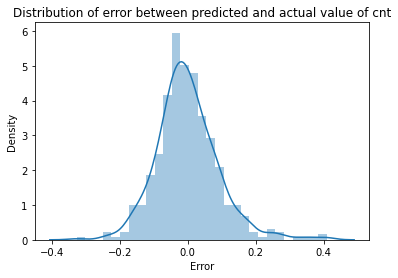

In [72]:
# Residual (error) is the difference between predicted value and actual values on train data
error = y_train_pred - y_train
# plotting the histogram of errors
sns.distplot(error)
plt.xlabel('Error')
plt.title('Distribution of error between predicted and actual value of cnt')
plt.show()

From the above plot it's proved that the model is satisfying this condition

#### Linear Regression Assumption 2: Independent variables have linear relationship with target variable
##### Below plots showing good linear relationship between target variable and predictor variables

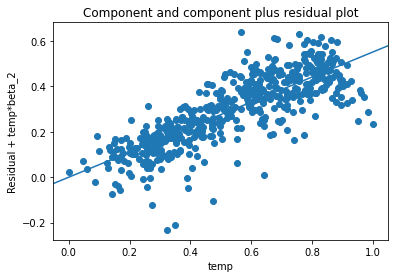

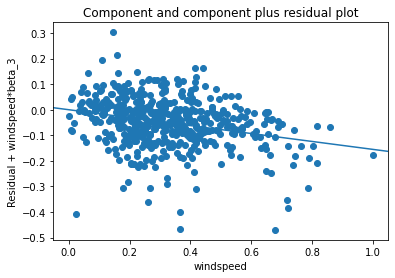

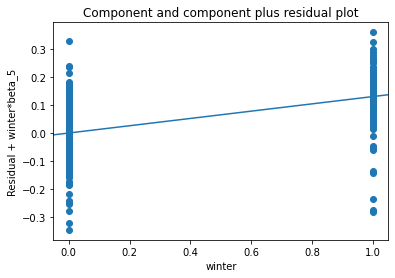

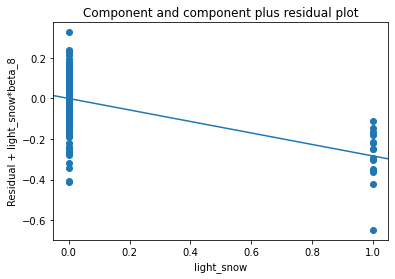

In [73]:
sm.graphics.plot_ccpr(lr_sm,'temp')
plt.show()
sm.graphics.plot_ccpr(lr_sm,'windspeed')
plt.show()
sm.graphics.plot_ccpr(lr_sm,'winter')
plt.show()
sm.graphics.plot_ccpr(lr_sm,'light_snow')
plt.show()

#### Homoscedasticity

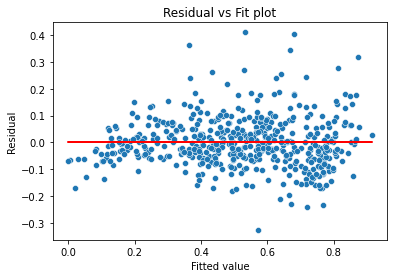

In [96]:
sns.scatterplot(y_train_pred,error)
plt.title('Residual vs Fit plot')
plt.xlabel('Fitted value')
plt.ylabel('Residual')
plt.plot(y_train_pred,(y_train_pred - y_train_pred), '-r')
plt.show()

#### No visible patter between the errors hence we can say that variance is constant across X and Y
##### In the summary of final model the value of Durbin-Watson is 2.052 , which means there is no correlation between residuals hence it proves that the error terms are independent of each other.

# Step 6 : Final model evaluation on test data

In [75]:
# Applying changes on the test data which were applied on the train data set to predict values using the model 
# trained above
# Scaling the numerical variables on the MinMaxscale which was trained
df_test[colsToScale] = scale.transform(df_test[colsToScale])

In [76]:
df_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,oct,sep,mon,sat,sun,thu,tue,wed,light_snow,mist
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0.692706,0,0,...,0,0,1,0,0,0,0,0,0,1
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0.712034,0,1,...,0,0,0,0,0,0,0,1,0,0
299,0,0,1,0.511964,0.496145,0.837699,0.334206,0.303382,0,0,...,1,0,0,0,0,1,0,0,0,1
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0.547400,0,0,...,0,0,0,0,0,0,0,1,0,0
152,0,0,1,0.817246,0.741471,0.314298,0.537414,0.569029,0,1,...,0,0,0,0,0,1,0,0,0,0


In [77]:
df_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,oct,sep,mon,sat,sun,thu,tue,wed,light_snow,mist
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.036364,0.700000,0.558718,0.532847,0.638221,0.313293,0.522154,0.254545,0.263636,...,0.086364,0.086364,0.127273,0.118182,0.145455,0.163636,0.168182,0.100000,0.027273,0.318182
std,0.500809,0.187620,0.459303,0.233187,0.217401,0.148694,0.159584,0.219163,0.436599,0.441609,...,0.281541,0.281541,0.334038,0.323559,0.353363,0.370789,0.374881,0.300684,0.163248,0.466833
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.355429,0.344870,0.529197,0.198843,0.378595,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558172,0.544652,0.625590,0.300126,0.524678,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.755981,0.713308,0.743798,0.402718,0.677750,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [78]:
# Creating variable X_test and Y_test for model testing
X_test = df_test
y_test = X_test.pop('cnt')

In [79]:
# Considering only those columns from X_test dataset which were finalized on the train data 
X_test_1 = X_test[list(X_train_1.columns)]

In [80]:
# saving the predicted values on test dataset in y_test_pred using sklearn model trained
y_test_pred = lr.predict(X_test_1)

In [81]:
# R-square evaluation on test data
r2_test = round(r2_score(y_test,y_test_pred),3) 
print(f'R-square on test data : {r2_test}')

R-square on test data : 0.793


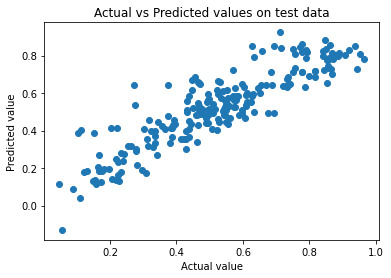

In [82]:
plt.scatter(y_test,y_test_pred)
plt.title('Actual vs Predicted values on test data')
plt.xlabel('Actual value')
plt.ylabel('Predicted value')
plt.show()

In [83]:
# predicting target variable on test data using statsmodels 
# adding constant to work with statsmodels
X_test_sm = sm.add_constant(X_test_1)
y_test_pred_sm = lr_sm.predict(X_test_sm)

In [84]:
# R-square value on the predicted values from statsmodels 
r2_test_sm = round(r2_score(y_test,y_test_pred_sm),3) 
print(f'R-square on test data using statsmodels : {r2_test_sm}')

R-square on test data using statsmodels : 0.793


In [93]:
# calculating adjusted R-square on test data set
# Formula for adjusted r_square = 1 - (1-R^2)(N-1)/(N-P-1)
# N = 220 (Number of total records) , P = 9 (No of predictor variables
adjusted_r_square = round(1 - ((1-r2_test)*(X_test_1.shape[0] -1)/(X_test_1.shape[0] - X_test_1.shape[1] -1)),3)
print(f'Adjusted R-square on test data : {adjusted_r_square}')

Adjusted R-square on test data : 0.784


In [95]:
# Coefficients for each feature
a = dict(list(zip(X_test_1.columns,lr.coef_)))
sorted(a.items(), key=lambda x: x[1], reverse=True)
 

[('temp', 0.5521743083053702),
 ('yr', 0.23308440659788063),
 ('winter', 0.12972268706023088),
 ('sep', 0.0958748240886227),
 ('summer', 0.08923847427982443),
 ('sun', -0.046400424601746884),
 ('mist', -0.07857130380045385),
 ('windspeed', -0.155211411433457),
 ('light_snow', -0.2832758287916541)]

## Final observations: 





| Metrics           | Train data | Test data |
|-------------------|------------|-----------|
| R-square          | 0.831      | 0.793     |
| Adjusted R-square | 0.828      | 0.784     |








1. R-square for test data is within .5 range of R-square value of train data set hence we can say that model is generalising good on test (unseen) data
2. Temperature and year have the biggest impact on the demand of bikes. In 2019 the demand has increased compare to 2018. When temparature is pleasant the demand increases.
3. Key variables which are the predictor in the demand of bikes are as follows:
    * Temperature
    * Year
    * Bikes rented in Summer and Winter
    * Bikes rented in Sep (Impact of fall)
4. Follwing predictors have negative impact on the demand: 
    * High Windspeed
    * Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
    * Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
    * Sunday